***Exercise 1***

Load the dataset *WA_Fn-UseC_-Telco-Customer-Churn.csv* provided. Perform transformations on it so it is prepared to build a model (scaling the numerical data and the cathegorical features transformed in numerical integer labels.  

In [23]:
# your code here!

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

categorical_data = df[categorical_columns].values
numerical_data = df[numerical_columns].values

scaler = preprocessing.StandardScaler()
numerical_data_transformed = scaler.fit_transform(numerical_data)

enc = preprocessing.OrdinalEncoder()
categorical_data_transformed = enc.fit_transform(categorical_data)

print(numerical_columns)
print(numerical_data_transformed[:5])
print()
print(categorical_columns)
print(categorical_data_transformed[:5])

['SeniorCitizen', 'tenure', 'MonthlyCharges']
[[-0.43991649 -1.27744458 -1.16032292]
 [-0.43991649  0.06632742 -0.25962894]
 [-0.43991649 -1.23672422 -0.36266036]
 [-0.43991649  0.51425142 -0.74653546]
 [-0.43991649 -1.23672422  0.19736523]]

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
[[5.375e+03 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 2.000e+00 2.505e+03 0.000e+00]
 [3.962e+03 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  2.000e+00 0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 3.000e+00 1.466e+03 0.000e+00]
 [2.564e+03 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  2.000e+00 2.000e+00 0.000e+00 

***Exercise 2***

Download from https://www.kaggle.com/ the regression dataset: Student Study Hours. Create a model and make 3 predictions. Make some nice graphics to depict the model (training set, test set, predictions). 

Prediction for 10 hours of sleep:  [101.57898343]
Prediction for 12 hours of sleep:  [121.606931]
Prediction for 16 hours of sleep:  [161.66282613]


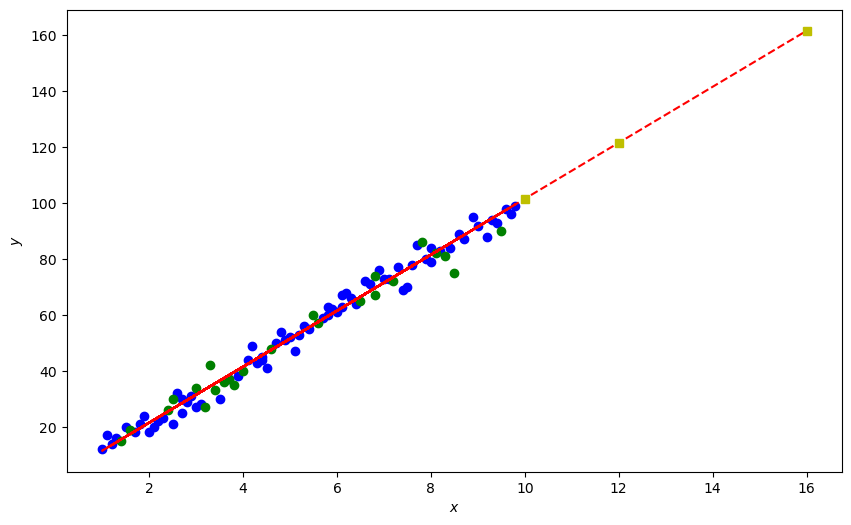

In [24]:
#your code here

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('score_updated.csv')

X = np.array(df['Hours'])
y = np.array(df['Scores'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

lr = LinearRegression().fit(X_train, y_train)

a = lr.coef_[0] 
b = lr.intercept_ 

pred1 = lr.predict([[10]])
pred2 = lr.predict([[12]])
pred3 = lr.predict([[16]])
print("Prediction for 10 hours of sleep: ", pred1)
print("Prediction for 12 hours of sleep: ", pred2)
print("Prediction for 16 hours of sleep: ", pred3)

fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

x = X.T
best_fit = b + a * (np.append(x, [16]))

ax_scat.scatter(X_train, y_train, color='blue', label = 'Training Set')
ax_scat.scatter(X_test, y_test, color='green', label = 'Testing Set')
ax_scat.plot(np.append(x,[16]), best_fit, ls='--', color='red', label='Best Fit Line')

ax_scat.plot([16],pred3, "ys", label="LinearRegression")
ax_scat.plot([12],pred2, "ys", label="LinearRegression")
ax_scat.plot([10],pred1, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');

***Exercise 3***

Import with pandas the file iris_teach_2.csv into the pandas DataFrame with the name df_iris.

Use the method isnull() from the class DataFrame to check if there are empty cells in the dataset. (Hint: check the documentation and use this method with respect to your DataFrame object; use the method .sum() to the result to count the empty cells on columns)

We see that we have some empty cells on some rows. Delete these rows (hint: use the method dropna() from pandas.DataFrame class, with the argument inplace=True). Check the documentation why we use that argument (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)!

Divide the dataset in two parts: a set X for features and y for target.

Create a LabelEncoder object to encode the classes from the target. Fit it with the y list, and encode y with it. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

Divide the dataset in a training and a testing set as we did it in the previous laboratory with the sklearn function train_test_split. Check the documentation why we use for random_state a fixed value here! (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [25]:
# your code here

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_iris = pd.read_csv("iris_teach_2.csv")

df_iris.dropna(inplace=True)

X = df_iris.drop(columns=['iris_name'])
y = df_iris['iris_name']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train[:5])
print(y_train[:5])
print()
print(X_test[:5])
print(y_test[:5])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
64                 5.9               3.0                4.2               1.5
95                 5.8               2.6                4.0               1.2
115                6.8               3.0                5.5               2.1
2                  4.7               3.2                1.3               0.2
144                6.9               3.1                5.1               2.3
[1 1 2 0 2]

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
117                5.8               2.8                5.1               2.4
65                 6.0               2.2                4.0               1.0
34                 5.5               4.2                1.4               0.2
110                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2
[2 1 0 2 0]


***Exercise 4***

Drop the petal width column from the database and create a decision tree in a similar way with the example.

Find the proper depth and evaluate the score for the decision tree model that you build.

<Axes: title={'center': 'Pearson Correlation of Features'}>

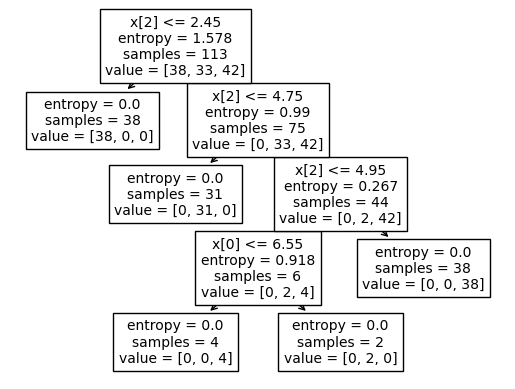

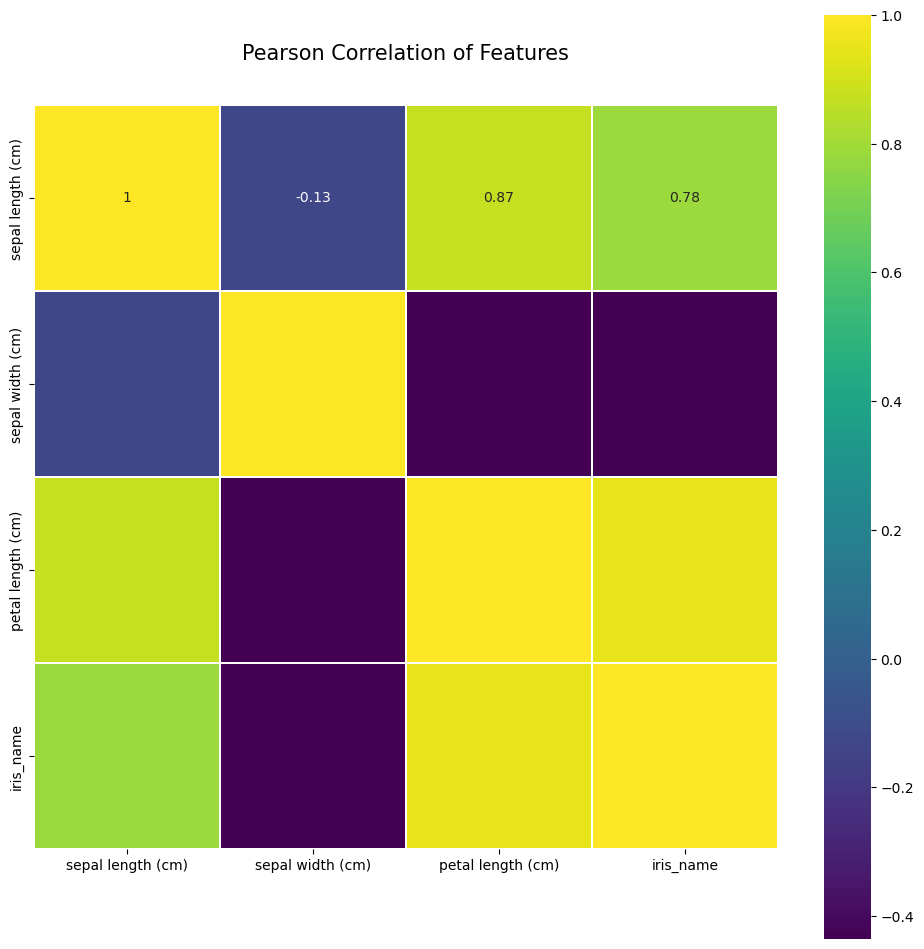

In [26]:
# your code here

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
import seaborn as sns

df_iris = pd.read_csv("iris_teach_2.csv")
df_iris.drop(columns=['petal width (cm)'], inplace=True)

df_iris.dropna(inplace=True)

X = df_iris.drop(columns=['iris_name'])
y = df_iris['iris_name']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
tree_clf.fit(X_train, y_train)
plot_tree(tree_clf)

df_clean_iris_set = X.copy()
df_clean_iris_set['iris_name']=y
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [27]:
# your code here 
from sklearn.model_selection import GridSearchCV 

param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
grid_search.fit(X_train, y_train) 
print("Best hyperparameters:", grid_search.best_params_)

y_pred = tree_clf.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Best hyperparameters: {'max_depth': 4}
Accuracy: 0.87


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.578\nsamples = 113\nvalue = [38, 33, 42]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 0.99\nsamples = 75\nvalue = [0, 33, 42]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.267\nsamples = 44\nvalue = [0, 2, 42]')]

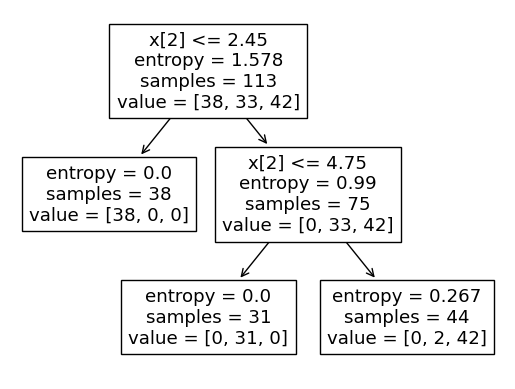

In [28]:
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
tree_clf_tuned.fit(X_train, y_train)
plot_tree(tree_clf_tuned)

***Exercise 5***

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR.

Your task is to create a Perceptron instance and train it using a proper dataset and the binary cross-entropy loss with stochastic gradient descent optimizer.


Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCELoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.

In [29]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

perceptron = Perceptron(input_size, output_size)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)

input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
labels = torch.tensor([[0.], [1.], [1.], [1.]])

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = perceptron(input_data).round()
    correct_predictions = (predicted == labels).sum().item()
    accuracy = correct_predictions / len(labels)
    print(f'Accuracy: {accuracy:.2f}')

Epoch [100/1000], Loss: 0.3438
Epoch [200/1000], Loss: 0.2670
Epoch [300/1000], Loss: 0.2173
Epoch [400/1000], Loss: 0.1824
Epoch [500/1000], Loss: 0.1566
Epoch [600/1000], Loss: 0.1369
Epoch [700/1000], Loss: 0.1214
Epoch [800/1000], Loss: 0.1089
Epoch [900/1000], Loss: 0.0986
Epoch [1000/1000], Loss: 0.0899
Accuracy: 1.00


***Exercise 6***

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how fast they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import OrderedDict

model1 = nn.Sequential(OrderedDict([ # one hidden layer with 2 neurons
            ('fc1', nn.Linear(2, 2)),
            ('activation1', nn.ReLU()),
            ('fc2', nn.Linear(2, 2)),
            ('activation2', nn.Sigmoid())
        ]))

model2 = nn.Sequential(OrderedDict([ # one hidden layer with 4 neurons
            ('fc1', nn.Linear(2, 4)),
            ('activation1', nn.ReLU()),
            ('fc2', nn.Linear(4, 2)),
            ('activation2', nn.Sigmoid())
        ]))

model3 = nn.Sequential(OrderedDict([ # 2 hidden layers with 2 neurons
            ('fc1', nn.Linear(2, 2)),
            ('activation1', nn.ReLU()),
            ('fc2', nn.Linear(2, 2)),
            ('activation2', nn.ReLU()),
            ('fc3', nn.Linear(2, 2)),
            ('activation3', nn.Sigmoid())
        ]))

data_in = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
data_target = torch.tensor([[0., 0.], [0., 1.], [0., 1.], [1., 0.]])

criterion = nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.1)

In [19]:
# Model1
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model1(data_in)
    loss = criterion(outputs, data_target)

    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model1(data_in).round()
    correct_predictions = (predicted == data_target).all(dim=1).sum().item()
    accuracy = correct_predictions / len(data_target)
    print(f'Accuracy: {accuracy:.2f}')

Epoch [100/1000], Loss: 0.6075
Epoch [200/1000], Loss: 0.5565
Epoch [300/1000], Loss: 0.5166
Epoch [400/1000], Loss: 0.4822
Epoch [500/1000], Loss: 0.4539
Epoch [600/1000], Loss: 0.4319
Epoch [700/1000], Loss: 0.4146
Epoch [800/1000], Loss: 0.4027
Epoch [900/1000], Loss: 0.3929
Epoch [1000/1000], Loss: 0.3860
Accuracy: 0.75


In [20]:
# Model2
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model2(data_in)
    loss = criterion(outputs, data_target)

    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model2(data_in).round()
    correct_predictions = (predicted == data_target).all(dim=1).sum().item()
    accuracy = correct_predictions / len(data_target)
    print(f'Accuracy: {accuracy:.2f}')

Epoch [100/1000], Loss: 0.5829
Epoch [200/1000], Loss: 0.5082
Epoch [300/1000], Loss: 0.4236
Epoch [400/1000], Loss: 0.3280
Epoch [500/1000], Loss: 0.2322
Epoch [600/1000], Loss: 0.1537
Epoch [700/1000], Loss: 0.1023
Epoch [800/1000], Loss: 0.0710
Epoch [900/1000], Loss: 0.0521
Epoch [1000/1000], Loss: 0.0398
Accuracy: 1.00


In [21]:
best_model = model2
for name, param in best_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc1.weight tensor([[-2.5027,  1.8547],
        [ 0.7154,  0.8242],
        [-1.8170, -1.8168],
        [ 1.2187, -2.6031]])
fc1.bias tensor([0.6474, 1.0996, 1.8148, 1.3788])
fc2.weight tensor([[-2.4581,  1.0416, -0.4646, -2.4882],
        [ 2.0327, -0.8374, -3.0250,  1.8131]])
fc2.bias tensor([ 0.3047, -0.3980])


In [22]:
# Model3
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model3(data_in)
    loss = criterion(outputs, data_target)

    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model3(data_in).round()
    correct_predictions = (predicted == data_target).all(dim=1).sum().item()
    accuracy = correct_predictions / len(data_target)
    print(f'Accuracy: {accuracy:.2f}')

Epoch [100/1000], Loss: 0.6297
Epoch [200/1000], Loss: 0.6280
Epoch [300/1000], Loss: 0.6278
Epoch [400/1000], Loss: 0.6278
Epoch [500/1000], Loss: 0.6278
Epoch [600/1000], Loss: 0.6277
Epoch [700/1000], Loss: 0.6277
Epoch [800/1000], Loss: 0.6277
Epoch [900/1000], Loss: 0.6277
Epoch [1000/1000], Loss: 0.6277
Accuracy: 0.25
